# Understanding Pandas Series and DataFrames - Lab

# Introduction

In this lab, let's get some hands on practice working with data cleanup using Pandas.

## Objectives
You will be able to:

* Manipulate columns in DataFrames (df.rename, df.drop)
* Manipulate the index in DataFrames (df.reindex, df.drop, df.rename)
* Manipulate column datatypes

In [191]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [192]:
df = pd.read_csv('turnstile_180901.txt')
print(len(df))
df.head()

197625


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


# Practice

## Objectives
You will be able to:
* Understand and explain what Pandas Series and DataFrames are and how they differ from dictionaries and lists
* Create Series & DataFrames from dictionaries and lists
* Manipulate columns in DataFrames (df.rename, df.drop)
* Manipulate the index in DataFrames (df.reindex, df.drop, df.rename)
* Manipulate column datatypes

# Rename all the columns to lower case

In [193]:
#Your code here
new_cols = [col.lower() for col in df.columns]

new_cols

['c/a',
 'unit',
 'scp',
 'station',
 'linename',
 'division',
 'date',
 'time',
 'desc',
 'entries',
 'exits                                                               ']

In [194]:
df.columns = ['c/a',
 'unit',
 'scp',
 'station',
 'linename',
 'division',
 'date',
 'time',
 'desc',
 'entries',
 'exits']

# Change the Index to be the Line Names

In [195]:
#Your code here
df.set_index('LINENAME')

KeyError: 'LINENAME'

# Painstakingly change the index back

In [196]:
# Your code here

df = df.reset_index() #Not that painful
df.head()

,index,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits
0,0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Create another column 'Num_Lines' that is a count of how many lines pass through a station. Then sort your dataframe by this column in descending order.

In [197]:
# Your code here

df['Num_lines'] = df.LINENAME.map(lambda x: len(x))
df.head()

AttributeError: 'DataFrame' object has no attribute 'LINENAME'

## Write a function to clean a column name.

In [198]:
def clean(col_name):
    cleaned = col_name.upper()
    
    
    #Your code here; whatever you want to do to col_name. Hint: think back to str methods.
    return cleaned

In [199]:
#This is a list comprehension. It applies your clean function to every item in the list.
#We then reassign that to df.columns
#You shouldn't have to change anything here.
#Your function above should work appropriately here.
df.columns = [clean(col) for col in df.columns] 

In [200]:
#Checking the output, we can see the results.
df.columns

Index(['INDEX', 'C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION',
       'DATE', 'TIME', 'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

## Compare subway traffic by day of the week. Display this as a graph.

In [201]:
#Your code here
df.DATE = pd.to_datetime(df.DATE)

In [202]:
df_day = df.DATE.dt.day_name()
df_day.head(10)

0    Saturday
1    Saturday
2    Saturday
3    Saturday
4    Saturday
5    Saturday
6      Sunday
7      Sunday
8      Sunday
9      Sunday
Name: DATE, dtype: object

In [203]:
df['Dayofweek'] = df.DATE.dt.day_name()

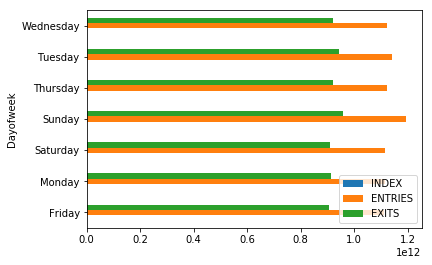

In [204]:
grouped = df.groupby('Dayofweek').sum()
grouped.plot(kind='barh')

## Is there more subway traffic on a weekend or a weekday?    Be specific in comparing magnitudes.

In [205]:
grouped = grouped.reset_index()
grouped.head()

,Dayofweek,INDEX,ENTRIES,EXITS
0,Friday,2778112001,1110224700078,906799065337
1,Monday,2783610827,1114237052454,911938153513
2,Saturday,2741377942,1115661545514,909142081474
3,Sunday,2792287000,1192306179082,959223750461
4,Thursday,2817391725,1122723988662,920691927110


In [206]:
print(grouped.columns)

Index(['Dayofweek', 'INDEX', 'ENTRIES', 'EXITS'], dtype='object')


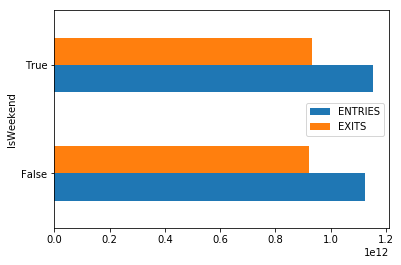

In [207]:
grouped['IsWeekend'] = grouped.Dayofweek.map({'Monday':False,'Tuesday':False,'Wednesday':False,'Thursday':False,'Friday':False,'Saturday':True,'Sunday':True})
wkend = grouped.groupby('IsWeekend').mean()
wkend[['ENTRIES', 'EXITS']].plot(kind='barh')

# Drop a couple of columns

In [209]:
# Your code here

df = df.drop('DESC', axis=1)
df.head()

,INDEX,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,Dayofweek
0,0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-08-25,00:00:00,6736067,2283184,Saturday
1,1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-08-25,04:00:00,6736087,2283188,Saturday
2,2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-08-25,08:00:00,6736105,2283229,Saturday
3,3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-08-25,12:00:00,6736180,2283314,Saturday
4,4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-08-25,16:00:00,6736349,2283384,Saturday
